# Let's take a look of Boston AirBnB Open Data using Python

By analyzing AirBnB Boston Open Data, We can provide valuable informations to hosts and customers.

### 1. How do seasonal costs change?
Provide seasonal costs to customer. It can be used as a reference when planning a trip

### 2. Which features are most related to homestay cost?
Correlation analysis allows hosts to see which factors have a significant impact on price. As a result of the analysis, the factors that have the greatest influence on price were in the order of number of accommodates, number of bedrooms, number of beds, number of bathrooms, and number of guests included. So, when the host decides the price, it's easier to find the right price through these five factors than other factors.

### 3. What is different between superhost and regular host?
AirBnB Superhost have more benefits than regular host. If we know what is different between superhost and regular host, It is much easier to become superhost. By the analysis, Big differences between superhost and regular host in Boston are location and number of reviews. Unexpectedly, average review scores are very similar.

In [135]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import gmplot
%matplotlib inline

In [136]:
calendar = pd.read_csv("calendar.csv")
listings = pd.read_csv("listings.csv")
reviews = pd.read_csv("reviews.csv")

## Data Understanding - Let's see the data!

### Calendar.csv
- 1,393,570 rows
- Price is String of Decimal, with US Dollar symbol($)
- On days when accommodation is unavailable(unavailable=f), the price is NaN
- No duplicated values

In [137]:
calendar.head()

,listing_id,date,available,price
0,12147973,2017-09-05,f,NaN
1,12147973,2017-09-04,f,NaN
2,12147973,2017-09-03,f,NaN
3,12147973,2017-09-02,f,NaN
4,12147973,2017-09-01,f,NaN


In [138]:
calendar.describe()

,listing_id
count,1.308890e+06
mean,8.442118e+06
std,4.500149e+06
min,3.353000e+03
25%,4.679319e+06
50%,8.578710e+06
75%,1.279603e+07
max,1.493346e+07


### Listings.csv
- 3818 rows, 92 columns
- No duplicated
- considerable counts of NaN

In [139]:
listings.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,12147973,https://www.airbnb.com/rooms/12147973,20160906204935,2016-09-07,Sunny Bungalow in the City,"Cozy, sunny, family home. Master bedroom high...",The house has an open and cozy feel at the sam...,"Cozy, sunny, family home. Master bedroom high...",none,"Roslindale is quiet, convenient and friendly. ...",NaN,"The bus stop is 2 blocks away, and frequent. B...","You will have access to 2 bedrooms, a living r...",NaN,Clean up and treat the home the way you'd like...,https://a2.muscache.com/im/pictures/c0842db1-e...,https://a2.muscache.com/im/pictures/c0842db1-e...,https://a2.muscache.com/im/pictures/c0842db1-e...,https://a2.muscache.com/im/pictures/c0842db1-e...,31303940,https://www.airbnb.com/users/show/31303940,Virginia,2015-04-15,"Boston, Massachusetts, United States",We are country and city connecting in our deck...,NaN,NaN,NaN,f,https://a2.muscache.com/im/pictures/5936fef0-b...,https://a2.muscache.com/im/pictures/5936fef0-b...,Roslindale,1,1,"['email', 'phone', 'facebook', 'reviews']",t,f,"Birch Street, Boston, MA 02131, United States",Roslindale,Roslindale,NaN,Boston,MA,02131,Boston,"Boston, MA",US,United States,42.282619,-71.133068,t,House,Entire home/apt,4,1.5,2.0,3.0,Real Bed,"{TV,""Wireless Internet"",Kitchen,""Free Parking ...",NaN,$250.00,NaN,NaN,NaN,$35.00,1,$0.00,2,1125,2 weeks ago,NaN,0,0,0,0,2016-09-06,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,NaN,NaN,f,moderate,f,f,1,NaN
1,3075044,https://www.airbnb.com/rooms/3075044,20160906204935,2016-09-07,Charming room in pet friendly apt,Charming and quiet room in a second floor 1910...,Small but cozy and quite room with a full size...,Charming and quiet room in a second floor 1910...,none,"The room is in Roslindale, a diverse and prima...","If you don't have a US cell phone, you can tex...",Plenty of safe street parking. Bus stops a few...,Apt has one more bedroom (which I use) and lar...,"If I am at home, I am likely working in my hom...",Pet friendly but please confirm with me if the...,https://a1.muscache.com/im/pictures/39327812/d...,https://a1.muscache.com/im/pictures/39327812/d...,https://a1.muscache.com/im/pictures/39327812/d...,https://a1.muscache.com/im/pictures/39327812/d...,2572247,https://www.airbnb.com/users/show/2572247,Andrea,2012-06-07,"Boston, Massachusetts, United States",I live in Boston and I like to travel and have...,within an hour,100%,100%,f,https://a2.muscache.com/im/users/2572247/profi...,https://a2.muscache.com/im/users/2572247/profi...,Roslindale,1,1,"['email', 'phone', 'facebook', 'linkedin', 'am...",t,t,"Pinehurst Street, Boston, MA 02131, United Sta

In [140]:
listings.describe()

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,neighbourhood_group_cleansed,latitude,longitude,accommodates,bathrooms,bedrooms,beds,square_feet,guests_included,minimum_nights,maximum_nights,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,jurisdiction_names,calculated_host_listings_count,reviews_per_month
count,3.585000e+03,3.585000e+03,3.585000e+03,3585.000000,3585.000000,0.0,3585.000000,3585.000000,3585.000000,3571.000000,3575.000000,3576.000000,56.000000,3585.000000,3585.000000,3.585000e+03,0.0,3585.00000,3585.000000,3585.000000,3585.000000,3585.000000,2772.000000,2762.000000,2767.000000,2765.000000,2767.000000,2763.000000,2764.000000,0.0,0.0,3585.000000,2829.000000
mean,8.440875e+06,2.016091e+13,2.492311e+07,58.902371,58.902371,NaN,42.340032,-71.084818,3.041283,1.221647,1.255944,1.609060,858.464286,1.429847,3.171269,2.872584e+04,NaN,8.64993,21.833194,38.558159,179.346444,19.044630,91.916667,9.431571,9.258041,9.646293,9.646549,9.414043,9.168234,NaN,NaN,12.733891,1.970908
std,4.500787e+06,8.516813e-01,2.292781e+07,171.119663,171.119663,NaN,0.024403,0.031565,1.778929,0.501487,0.753060,1.011745,608.874310,1.056787,8.874133,1.670136e+06,NaN,10.43533,21.860966,33.158272,142.136180,35.571658,9.531686,0.931863,1.168977,0.762753,0.735507,0.903436,1.011116,NaN,NaN,29.415076,2.120561
min,3.353000e+03,2.016091e+13,4.240000e+03,0.000000,0.000000,NaN,42.235942,-71.171789,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000e+00,NaN,0.00000,0.000000,0.000000,0.000000,0.000000,20.000000,2.000000,2.000000,2.000000,4.000000,2.000000,2.000000,NaN,NaN,1.000000,0.010000
25%,4.679319e+06,2.016091e+13,6.103425e+06,1.000000,1.000000,NaN,42.329995,-71.105083,2.000000,1.000000,1.000000,1.000000,415.000000,1.000000,1.000000,3.650000e+02,NaN,0.00000,0.000000,0.000000,19.000000,1.000000,89.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,NaN,NaN,1.000000,0.480000
50%,8.577620e+06,2.016091e+13,1.928100e+07,2.000000,2.000000,NaN,42.345201,-71.078429,2.000000,1.000000,1.000000,1.000000,825.000000,1.000000,2.000000,1.125000e+03,NaN,4.00000,16.000000,37.000000,179.000000,5.000000,94.000000,10.000000,10.000000,10.000000,10.000000,10.000000,9.000000,NaN,NaN,2.000000,1.170000
75%,1.278953e+07,2.016091e+13,3.622147e+07,7.000000,7.000000,NaN,42.354685,-71.062155,4.000000,1.000000,2.000000,2.000000,1200.000000,1.000000,3.000000,1.125000e+03,NaN,15.00000,40.000000,68.000000,325.000000,21.000000,98.250000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,NaN,6.000000,2.720000
max,1.493346e+07,2.016091e+13,9.385411e+07,749.000000,749.000000,NaN,42.389982,-71.000100,16.000000,6.000000,5.000000,16.000000,2400.000000,14.000000,300.000000,1.000000e+08,NaN,30.00000,60.000000,90.000000,365.000000,404.000000,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,NaN,136.000000,19.150000


### Reviews.csv
- 84849 rows, 6 columns
- NaN in comments(Only rating, no comment)
- No duplicates

In [141]:
reviews.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,1178162,4724140,2013-05-21,4298113,Olivier,My stay at islam's place was really cool! Good...
1,1178162,4869189,2013-05-29,6452964,Charlotte,Great location for both airport and city - gre...
2,1178162,5003196,2013-06-06,6449554,Sebastian,We really enjoyed our stay at Islams house. Fr...
3,1178162,5150351,2013-06-15,2215611,Marine,The room was nice and clean and so were the co...
4,1178162,5171140,2013-06-16,6848427,Andrew,Great location. Just 5 mins walk from the Airp...


In [142]:
reviews.describe()

,listing_id,id,reviewer_id
count,6.827500e+04,6.827500e+04,6.827500e+04
mean,4.759910e+06,5.246516e+07,2.802389e+07
std,3.788990e+06,2.790991e+07,2.234097e+07
min,3.353000e+03,1.021000e+03,1.430000e+02
25%,1.458081e+06,3.010420e+07,9.001346e+06
50%,4.080000e+06,5.223121e+07,2.305179e+07
75%,7.377034e+06,7.663248e+07,4.213454e+07
max,1.484378e+07,9.999045e+07,9.335034e+07


## Data Cleaning
Before we start analysis, clean, extract the data for later analysis

In [143]:
def split_host(df=listings):
    """
        split listings whether host is superhost or not(regular host)
    """
    superhosts = listings[listings.host_is_superhost == 't']
    regularhosts = listings[listings.host_is_superhost == 'f']
    
    return superhosts, regularhosts

superhosts, regularhosts = split_host()

In [144]:
def get_date_price(df=calendar):
    """
        extract date, price columns from dataframe.
        price column is cleaned by removing currency symbol and converting to float type
    """
    date_prices = df[['date', 'price']].dropna()
    date_prices.price = date_prices.price.str.replace(r"[,\$]", "").astype(float)
    date_prices.date = pd.to_datetime(date_prices.date)
    date_prices.date = date_prices.date.dt.month
    date_prices.columns = ['month', 'price']
    date_prices = date_prices
    
    return date_prices

date_prices = get_date_price()
date_prices

C:\Users\farhad\AppData\Local\Temp/ipykernel_892/4049298187.py:7: FutureWarning: The default value of regex will change from True to False in a future version.
  date_prices.price = date_prices.price.str.replace(r"[,\$]", "").astype(float)


,month,price
365,8,65.0
366,8,65.0
367,8,65.0
368,8,75.0
369,8,75.0
...,...,...
1308875,9,62.0
1308876,9,62.0
1308877,9,62.0
1308878,9,62.0


In [145]:
def get_listings_price(df=calendar):
    """
        get mean price by listing
        drop NaN - that means host is not available on a day
    """
    listing_prices = df.dropna()[['listing_id', 'price']]
    listing_prices.price = listing_prices.price.str.replace(r"[,\$]", "").astype(float)
    listing_prices = listing_prices.groupby('listing_id').mean()['price']
    return listing_prices

listings_price = get_listings_price()
listings_price

C:\Users\farhad\AppData\Local\Temp/ipykernel_892/3520049959.py:7: FutureWarning: The default value of regex will change from True to False in a future version.
  listing_prices.price = listing_prices.price.str.replace(r"[,\$]", "").astype(float)


listing_id
3353         35.204819
5506        147.267442
6695        197.407407
6976         65.000000
8792        154.000000
               ...    
14924831    169.515152
14928000     55.000000
14928333    105.380531
14933380     49.000000
14933461    165.113333
Name: price, Length: 2906, dtype: float64

In [146]:
#drop_column=['calculated_host_listings_count','license','latitude', 'longitude', 'id', ''scrape_id, 'host_id']

drop_columns = """
calculated_host_listings_count
license
latitude
longitude
id
scrape_id
host_id
""".split()
# square_feet

def get_useful_numeric_subset(df):
    """
        get only numeric column and drop useless columns(id, location)
    """
    return df.drop(columns=drop_columns)._get_numeric_data()


# get numeric subset of superhost, regular host
superhosts_numeric = get_useful_numeric_subset(superhosts)
regularhosts_numeric = get_useful_numeric_subset(regularhosts)

In [147]:
def get_location(df):
    """
        get latitude & longitude columns with no NaN
        if location or longitude is NaN, It cannot be displayed on the map.
    """
    columns = ['latitude', 'longitude']
    return df.dropna(subset=columns)[columns]

superhosts_location = get_location(superhosts)
regularhosts_location = get_location(regularhosts)

# Now, Let's analyze the data and answer the questions

## How do seasonal costs change?
Let's see the seasonal costs change by line chart of price means and quantiles

In [148]:
def get_monthly_price_quantiles(date_prices):
    """
        get monthly price quantiles and mean from date-prices
    """
    date_prices = date_prices.groupby("month")
    monthly_prices = pd.concat([date_prices.quantile(q=0.25), date_prices.quantile(q=0.5), date_prices.mean(), date_prices.quantile(q=0.75)], axis=1)
    monthly_prices.columns = ["Q1", "median", "mean", "Q3"]
    
    return monthly_prices

monthly_price_quantiles = get_monthly_price_quantiles(date_prices)
monthly_price_quantiles

,Q1,median,mean,Q3
month,,,,
1,85.0,150.0,182.799671,240.0
2,85.0,150.0,180.961028,239.0
3,85.0,149.0,181.818742,239.0
4,83.0,150.0,197.252890,250.0
5,80.0,150.0,193.712295,250.0
6,83.0,150.0,196.535302,250.0
7,83.0,150.0,202.486309,250.0
8,83.0,150.0,203.330142,250.0
9,98.0,190.0,237.047727,335.0


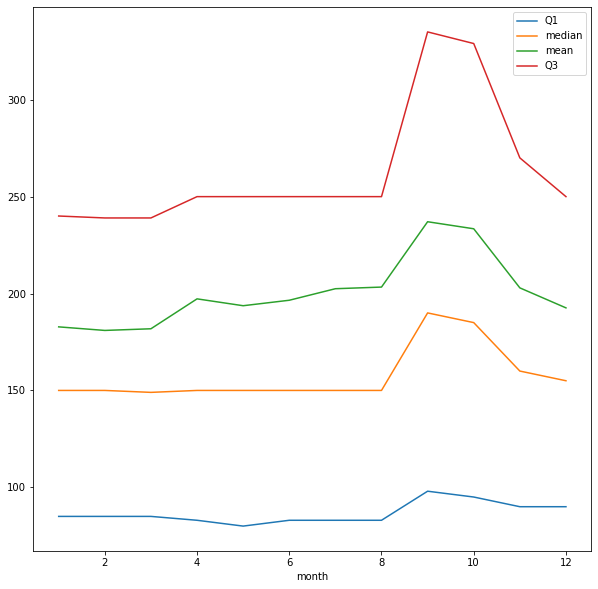

In [149]:
def plot_line_monthly_prices_quantile(monthly_price_quantiles):
    """
        show bar plot the quantile, mean prices by month
    """
    monthly_price_quantiles.plot.line(figsize=(10, 10))
    
plot_line_monthly_prices_quantile(monthly_price_quantiles)

1. Average prices are highest in summer and increase slightly in December. Perhaps summer holidays, year-end events, and Christmas were influential.
1. Prices fluctuate mainly at high price points, and cheap rooms do not change even when the season changes.

## Which features are most related to homestay cost?
By using `pandas.DataFrame.corr` can easily do correlation analysis. Let’s show the heatmap of correlation matrix by seaborn.

In [150]:
def get_listings_with_mean_price(listings, listings_price): 
    """
        add mean price column to listings
    """
    listings_numeric = pd.concat([listings.id, get_useful_numeric_subset(listings)], axis=1)
    listings_numeric = listings_numeric.fillna(0)
    listings_numeric = listings_numeric.merge(listings_price, left_on='id', right_on='listing_id')
    
    return listings_numeric

listings_with_mean_price = get_listings_with_mean_price(listings, listings_price)
listings_with_mean_price

,id,host_listings_count,host_total_listings_count,neighbourhood_group_cleansed,accommodates,bathrooms,bedrooms,beds,square_feet,guests_included,minimum_nights,maximum_nights,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,jurisdiction_names,reviews_per_month,price
0,3075044,1,1,0.0,2,1.0,1.0,1.0,0.0,0,2,15,0.0,26,54,84,359,36,94.0,10.0,9.0,10.0,10.0,9.0,9.0,0.0,1.30,67.813370
1,6976,1,1,0.0,2,1.0,1.0,1.0,0.0,1,3,45,0.0,19,46,61,319,41,98.0,10.0,9.0,10.0,10.0,9.0,10.0,0.0,0.47,65.000000
2,1436513,1,1,0.0,4,1.0,1.0,2.0,0.0,2,1,1125,0.0,6,16,26,98,1,100.0,10.0,10.0,10.0,10.0,10.0,10.0,0.0,1.00,75.000000
3,7651065,1,1,0.0,2,1.5,1.0,2.0,0.0,1,2,31,0.0,13,34,59,334,29,99.0,10.0,10.0,10.0,10.0,9.0,10.0,0.0,2.25,79.000000
4,12386020,2,2,0.0,2,1.0,1.0,1.0,0.0,1,2,1125,0.0,5,28,58,58,8,100.0,10.0,10.0,10.0,10.0,9.0,10.0,0.0,1.70,75.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2901,8373729,28,28,0.0,3,1.0,1.0,1.0,0.0,1,2,1125,0.0,21,51,81,356,4,90.0,10.0,10.0,10.0,10.0,8.0,9.0,0.0,0.34,70.657303
2902,14844274,2,2,0.0,2,1.0,1.0,1.0,0.0,1,3,365,0.0,29,59,89,364,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,150.000000
2903,14585486,1,1,0.0,4,1.0,1.0,1.0,0.0,1,3,12,0.0,0,15,40,40,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,123.275000
2904,14603878,4,4,0.0,2,1.0,1.0,1.0,0.0,1,1,13,0.0,5,5,5,253,2,90.0,9.0,8.0,9.0,9.0,8.0,7.0,0.0,2.00,59.000000


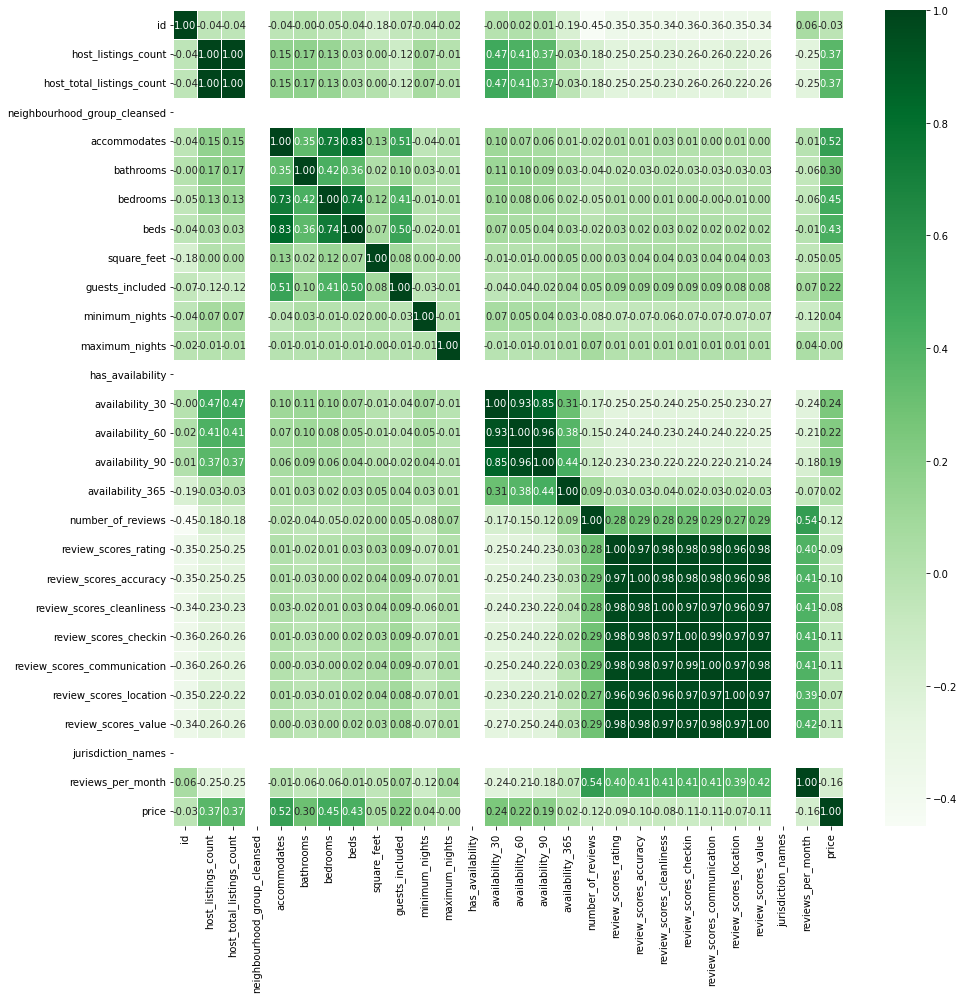

In [151]:
def plot_normalized_numeric_heatmap(listings_with_mean_price):
    """
        normalize all columns of dataframe and plot correlation heatmap
    """
    normalized_df=(listings_with_mean_price-listings_with_mean_price.mean())/listings_with_mean_price.std()
    
    plt.figure(figsize=(15,15))
    sns.heatmap(data = normalized_df.corr(), annot=True, fmt = '.2f', linewidths=.5, cmap='Greens')

plot_normalized_numeric_heatmap(listings_with_mean_price)

### Correlations related to reviews
1. Each score of review features has strong correlation.
1. Number of reviews and price has a little negative correlation. Expensive homestay are expected to no attract many people and have fewer reviews.

### Correlations related to bathrooms, accommodates, bedrooms, beds
1. The number of bedrooms, the number of bathrooms, and the number of beds have a high correlation with each other and a high correlation with price. It’s natural to think that the more rooms, beds, and toilets you have, the more expensive it becomes. However, the number of people was the most influential among them (0.52).
1. Whether or not a homestay can be rented for a long time has no significant correlation with other features other than each other. The minimum and maximum stay dates are not significantly correlated with other features.

## What is different between superhost and regular host?
Let's compare the mean of numeric columns between superhost and regular host

In [152]:
def get_numeric_mean_by_hosts(superhosts_numeric, regularhosts_numeric):
    """
        get mean values of numeric column by host
        mean() function skip NaN values
        NaN is difficult to measure, so exclude it
    """
    
    # drop useless columns and get only numeric data
    mean_compare = pd.concat(
        [
            superhosts_numeric.mean(), 
            regularhosts_numeric.mean()
        ], 
        axis=1
    )
    mean_compare.columns = ["superhost", "regular"]
    
    # add dataframe length on the first row
    return pd.concat([
        pd.DataFrame(
            [[len(superhosts), len(regularhosts)]], 
            index = ['count'],
            columns=mean_compare.columns
        ), 
        mean_compare
    ])

numeric_mean_by_hosts = get_numeric_mean_by_hosts(superhosts_numeric, regularhosts_numeric)
numeric_mean_by_hosts

,superhost,regular
count,407.000000,3178.000000
host_listings_count,3.422604,66.007552
host_total_listings_count,3.422604,66.007552
neighbourhood_group_cleansed,NaN,NaN
accommodates,3.125307,3.030522
bathrooms,1.282555,1.213812
bedrooms,1.321867,1.247475
beds,1.658477,1.602714
square_feet,558.142857,901.367347
guests_included,1.714988,1.393329


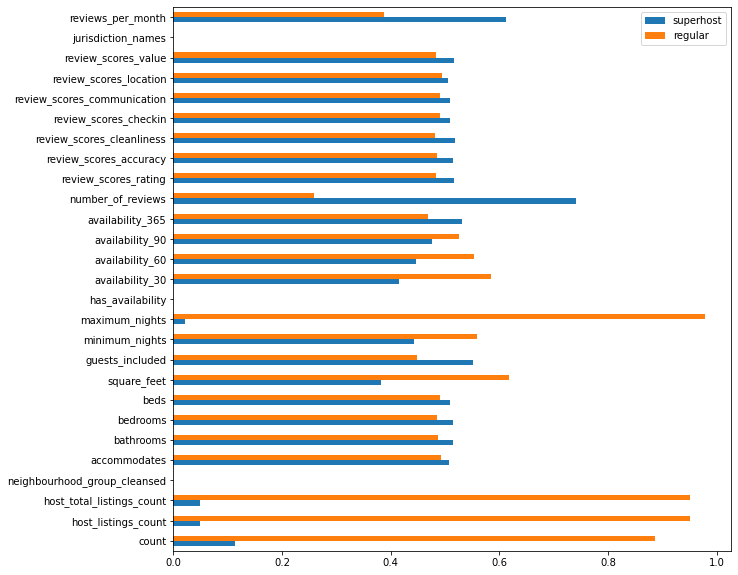

In [153]:
def plot_numeric_mean_by_host(numeric_mean_by_hosts):
    """
        The average value of superhost and normal host is converted to a relative ratio 
        for easy viewing and displayed as a bar histogram.
    """
    proportions = numeric_mean_by_hosts.div(numeric_mean_by_hosts.sum(axis=1), axis=0)
    proportions.plot(kind='barh', figsize=(10, 10))
    
plot_numeric_mean_by_host(numeric_mean_by_hosts)

1. Superhosts almost slightly outperformed all score of reviews. However, there are far more reviews written. It could be because more customers are staying at accommodation on the superhost, or it could be because the superhost encourages customers to actively write reviews.
1. Another difference is that on average the regularhosts has fewer rooms than the rest of the hosts.
1. The average number of beds, toilets, and number of people in a room operated by superhosts are slightly more than regularhosts. But there is a shorter minimum/maximum period for customers to stay in superhosts compared to the regularhosts.

## Date the host started hosting
Assuming that the higher the number of reviews, the more customers it attracts, the more likely a superhost will have other factors that can attract more customers. For example, they may have been running a homestay for a long time, or their location may be better.

In [154]:
def get_host_since_year(df):
    return df.host_since.str.split("-", expand=True)[0].astype(int)

In [155]:
def plot_hist_host_since(df, title):
    df.plot.hist(bins=len(df.value_counts()), title=title)

In [156]:
superhosts, regularhosts = split_host()

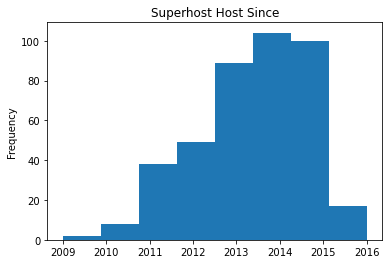

In [157]:
plot_hist_host_since(get_host_since_year(superhosts), "Superhost Host Since")

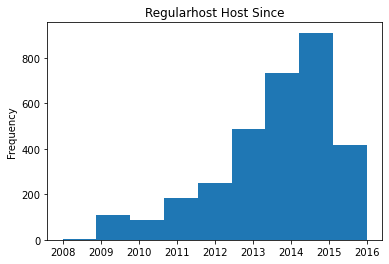

In [158]:
plot_hist_host_since(get_host_since_year(regularhosts), "Regularhost Host Since")

AirBnB superhost do not requires long hosting period. Host can become a superhost even if hosting period is less than 12 months. Hosting for a long time doesn’t mean host will become a superhost.

## Location differences between superhosts and regular hosts
It was not possible to identify nearby facilities with the given data. So I marked the host’s location on the map. Red is superhost, blue is regular host.

In [159]:
def gmplot_host_location(locations, color, name, size=40):
    gmap = gmplot.GoogleMapPlotter(42.2826188, -71.13306793, 12)
    gmap.scatter(locations.latitude, locations.longitude, color=color, size=size, marker=False)
    gmap.draw(f"map-{name}.html")

gmplot_host_location(superhosts_location, "#FF0000", "superhost")
gmplot_host_location(regularhosts_location, "#0000FF", "regularhost")
# and open 'map-superhost.html', 'map-regularhost.html' file!


# Conclusion
1. Accommodation prices increase in summer and December and are lowest at the beginning of the year. However, the lower the price, the less the volatility.
1. The size of the accommodation has a big impact on the price. Price and number of reviews have a weak negative correlation.
1. The biggest distinction between the superhost and the rest is the number of reviews. The rating is slightly higher than the rest, but it is about the same level.